In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization





# **NHẬN DIỆN LOÀI**


In [7]:
# Đường dẫn đến folder Datasets
dataset_path = '/content/drive/MyDrive/CV - Animal Emotion Recognition/Datasets'

# Chuẩn bị dữ liệu với ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Chia tập dữ liệu thành tập huấn luyện và kiểm tra
)



# Tạo bộ dữ liệu huấn luyện và kiểm tra cho nhận diện loài vật
train_species_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_species_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
# In các lớp của train_generator
print("Classes found in train_generator:")
print(train_species_generator.class_indices)

# In các lớp của val_generator
print("\nClasses found in val_generator:")
print(val_species_generator.class_indices)


Found 3638 images belonging to 2 classes.
Found 908 images belonging to 2 classes.
Classes found in train_generator:
{'Cat': 0, 'Dog': 1}

Classes found in val_generator:
{'Cat': 0, 'Dog': 1}


In [ ]:
# Xây dựng mô hình CNN cho nhận diện loài vật
model_species = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_species_generator.num_classes, activation='softmax')  # Số lớp theo số lượng loài
])

# Biên dịch mô hình
model_species.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
model_species.fit(
    train_species_generator,
    epochs=20,
    validation_data=val_species_generator
)

# Lưu mô hình đã huấn luyện
model_species.save('/content/drive/MyDrive/CV - Animal Emotion Recognition/species_model.h5')


Epoch 1/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 561s 5s/step - accuracy: 0.8678 - loss: 0.5077 - val_accuracy: 0.8899 - val_loss: 0.3608
Epoch 2/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.8871 - loss: 0.3406 - val_accuracy: 0.8899 - val_loss: 0.3182
Epoch 3/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8838 - loss: 0.3091 - val_accuracy: 0.8899 - val_loss: 0.3141
Epoch 4/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.8917 - loss: 0.2789 - val_accuracy: 0.8899 - val_loss: 0.2870
Epoch 5/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.8834 - loss: 0.2740 - val_accuracy: 0.8899 - val_loss: 0.2809
Epoch 6/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.8887 - loss: 0.2431 - val_accuracy: 0.8899 - val_loss: 0.2754
Epoch 7/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.8904 - loss: 0.2288 - val_accuracy: 0.9042 - val_loss: 0.2780
Epoch 8/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9000 - loss: 0.1950 - val_accu

# **NHẬN DIỆN CẢM XÚC**

In [9]:
# Đường dẫn đến folder Datasets chứa các hình ảnh cảm xúc của động vật
emotion_dataset_path = '/content/drive/MyDrive/CV - Animal Emotion Recognition/Emotion Datasets'

# Chuẩn bị dữ liệu với ImageDataGenerator
emotion_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Chia dữ liệu thành 80% huấn luyện và 20% kiểm tra
)

# Tạo bộ dữ liệu huấn luyện cho nhận diện cảm xúc
train_emotion_generator = emotion_datagen.flow_from_directory(
    emotion_dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Tạo bộ dữ liệu kiểm tra cho nhận diện cảm xúc
val_emotion_generator = emotion_datagen.flow_from_directory(
    emotion_dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)







Found 3635 images belonging to 7 classes.
Found 905 images belonging to 7 classes.


In [ ]:
# Xây dựng mô hình CNN cho nhận diện cảm xúc
model_emotion = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_emotion_generator.num_classes, activation='softmax')  # Số lớp theo số lượng cảm xúc
])

# Biên dịch mô hình
model_emotion.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = model_emotion.fit(
    train_emotion_generator,
    epochs=20,
    validation_data=val_emotion_generator
)

# Lưu mô hình đã huấn luyện
model_emotion.save('/content/drive/MyDrive/CV - Animal Emotion Recognition/emotion_model.h5')

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


114/114 ━━━━━━━━━━━━━━━━━━━━ 850s 7s/step - accuracy: 0.2316 - loss: 1.7321 - val_accuracy: 0.2994 - val_loss: 1.5489
Epoch 2/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.3377 - loss: 1.5014 - val_accuracy: 0.3171 - val_loss: 1.5192
Epoch 3/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.3598 - loss: 1.4569 - val_accuracy: 0.3348 - val_loss: 1.4940
Epoch 4/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.4340 - loss: 1.3500 - val_accuracy: 0.3746 - val_loss: 1.4763
Epoch 5/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.4744 - loss: 1.2917 - val_accuracy: 0.3569 - val_loss: 1.4985
Epoch 6/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.4975 - loss: 1.1784 - val_accuracy: 0.3724 - val_loss: 1.5351
Epoch 7/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.5544 - loss: 1.0749 - val_accuracy: 0.3680 - val_loss: 1.5811
Epoch 8/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.6335 - loss: 0.8990 - val_accuracy: 0.377

In [ ]:
# In các lớp của train_generator
print("Classes found in train_generator:")
print(train_emotion_generator.class_indices)

# In các lớp của val_generator
print("\nClasses found in val_generator:")
print(val_emotion_generator.class_indices)


Classes found in train_generator:
{'Angry': 0, 'Disgusted': 1, 'Happy': 2, 'Relaxed': 3, 'Sad': 4, 'Scared': 5, 'Surprised': 6}

Classes found in val_generator:
{'Angry': 0, 'Disgusted': 1, 'Happy': 2, 'Relaxed': 3, 'Sad': 4, 'Scared': 5, 'Surprised': 6}


In [5]:
# Hàm để đánh giá hiệu năng mô hình
def evaluate_model(model, data_generator, class_labels):
    # Dự đoán trên dữ liệu kiểm tra
    y_pred = model.predict(data_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Lấy lớp có xác suất cao nhất
    y_true = data_generator.classes  # Nhãn thực tế

    # Báo cáo phân loại
    print("Classification Report:")
    print(classification_report(y_true, y_pred_classes, target_names=class_labels))

    # Tạo ma trận nhầm lẫn
    conf_matrix = confusion_matrix(y_true, y_pred_classes)

    # Vẽ ma trận nhầm lẫn
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

model_species = load_model('/content/drive/MyDrive/CV - Animal Emotion Recognition/species_model.h5')
model_emotion = load_model('/content/drive/MyDrive/CV - Animal Emotion Recognition/emotion_model.h5')



# Đánh giá hiệu năng nhận biết loài vật
print("Evaluation for Animal Species Recognition Model")
evaluate_model(model_species, val_species_generator, class_labels=train_species_generator.class_indices.keys())

# Giả sử bạn có mô hình và generator cho nhận biết cảm xúc
# Đánh giá hiệu năng nhận biết cảm xúc
print("\nEvaluation for Emotion Recognition Model")
evaluate_model(model_emotion, val_emotion_generator, class_labels=train_emotion_generator.class_indices.keys())


Evaluation for Animal Species Recognition Model


NameError: name 'val_species_generator' is not defined

**THỬ NGHIỆM CẢI TIẾN MÔ HÌNH**
```
`# This is formatted as code`
```



In [16]:
# # Đường dẫn đến folder Datasets
# dataset_path = '/content/drive/MyDrive/CV - Animal Emotion Recognition/Datasets'

# # Chuẩn bị dữ liệu với ImageDataGenerator và tăng cường dữ liệu
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     validation_split=0.2,
#     rotation_range=30,        # Tăng xoay ảnh để tăng sự đa dạng
#     width_shift_range=0.3,
#     height_shift_range=0.3,
#     shear_range=0.3,
#     zoom_range=0.4,           # Tăng zoom để học thêm đặc trưng
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Tạo bộ dữ liệu huấn luyện và kiểm tra
# train_species_generator = datagen.flow_from_directory(
#     dataset_path,
#     target_size=(128, 128),
#     batch_size=32,
#     class_mode='categorical',
#     subset='training'
# )

# val_species_generator = datagen.flow_from_directory(
#     dataset_path,
#     target_size=(128, 128),
#     batch_size=32,
#     class_mode='categorical',
#     subset='validation'
# )

# # Tính toán trọng số lớp để cân bằng dữ liệu
# class_weights = compute_class_weight(
#     'balanced',
#     classes=np.unique(train_species_generator.classes),
#     y=train_species_generator.classes
# )
# class_weights_dict = dict(enumerate(class_weights))

# # Xây dựng mô hình CNN cải tiến
# model_species = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2)),

#     Conv2D(64, (3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2)),

#     Conv2D(128, (3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2)),

#     Conv2D(256, (3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2)),

#     Conv2D(512, (3, 3), activation='relu'),  # Lớp này giúp mô hình học các đặc trưng phức tạp hơn
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2)),

#     Flatten(),
#     Dense(512, activation='relu'),           # Lớp dense lớn để học đặc trưng mạnh
#     Dropout(0.5),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     Dense(train_species_generator.num_classes, activation='softmax')
# ])

# # Biên dịch mô hình với learning rate giảm để cải thiện học sâu
# model_species.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005), loss='categorical_crossentropy', metrics=['accuracy'])

# # Huấn luyện mô hình với trọng số lớp để cân bằng dữ liệu
# history = model_species.fit(
#     train_species_generator,
#     epochs=40,  # Tăng số lượng epochs để mô hình có thể học tốt hơn
#     validation_data=val_species_generator,
#     class_weight=class_weights_dict  # Áp dụng trọng số lớp cân bằng
# )

# # Lưu mô hình đã huấn luyện
# model_species.save('/content/drive/MyDrive/CV - Animal Emotion Recognition/species_model_improved.h5')


Found 3638 images belonging to 2 classes.
Found 908 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


114/114 ━━━━━━━━━━━━━━━━━━━━ 331s 3s/step - accuracy: 0.6765 - loss: 1.5563 - val_accuracy: 0.1101 - val_loss: 0.8697
Epoch 2/40
114/114 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.5693 - loss: 1.1240 - val_accuracy: 0.1101 - val_loss: 1.8042
Epoch 3/40
114/114 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.5959 - loss: 0.9778 - val_accuracy: 0.1861 - val_loss: 1.2123
Epoch 4/40
114/114 ━━━━━━━━━━━━━━━━━━━━ 343s 3s/step - accuracy: 0.5933 - loss: 0.9191 - val_accuracy: 0.4482 - val_loss: 0.9011
Epoch 5/40
114/114 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.6140 - loss: 0.8365 - val_accuracy: 0.4604 - val_loss: 0.8909
Epoch 6/40
114/114 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.6015 - loss: 0.8059 - val_accuracy: 0.5033 - val_loss: 0.8065
Epoch 7/40
114/114 ━━━━━━━━━━━━━━━━━━━━ 304s 3s/step - accuracy: 0.6160 - loss: 0.8411 - val_accuracy: 0.6145 - val_loss: 0.6768
Epoch 8/40
114/114 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.6363 - loss: 0.7543 - val_accuracy: 0.453

Evaluation for Animal Species Recognition Model Improved
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 700ms/step
Classification Report:
              precision    recall  f1-score   support

         Cat       0.10      0.22      0.14       100
         Dog       0.89      0.77      0.82       808

    accuracy                           0.71       908
   macro avg       0.50      0.49      0.48       908
weighted avg       0.80      0.71      0.75       908



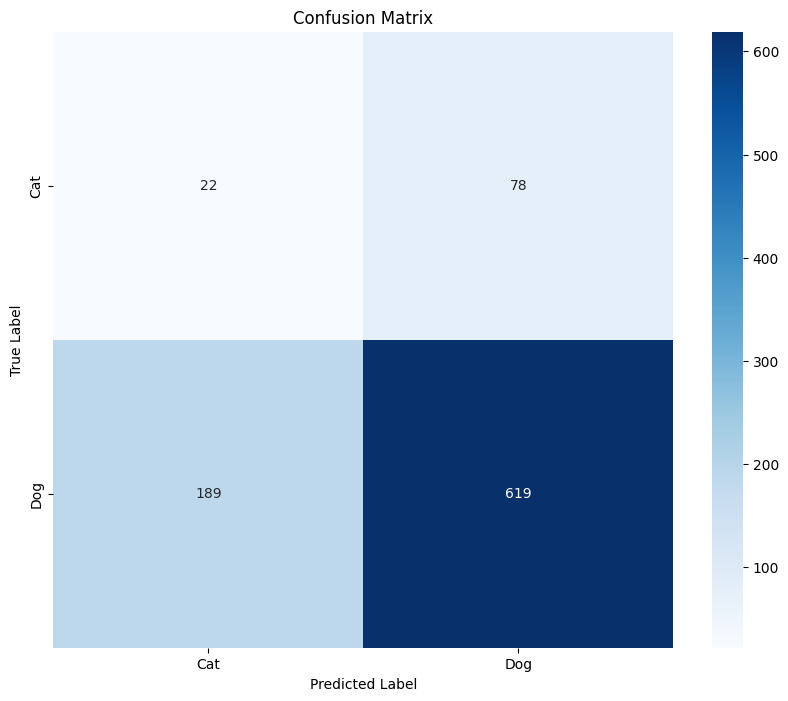

In [17]:
# model_species_improved = load_model('/content/drive/MyDrive/CV - Animal Emotion Recognition/species_model_improved.h5')

# # Đánh giá hiệu năng nhận biết loài vật
# print("Evaluation for Animal Species Recognition Model Improved")
# evaluate_model(model_species, val_species_generator, class_labels=train_species_generator.class_indices.keys())


In [23]:
# # Đường dẫn đến folder Datasets
# dataset_path = '/content/drive/MyDrive/CV - Animal Emotion Recognition/Datasets'

# # Chuẩn bị dữ liệu với ImageDataGenerator
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     validation_split=0.2  # Chia tập dữ liệu thành tập huấn luyện và kiểm tra
# )

# # Tạo bộ dữ liệu huấn luyện và kiểm tra cho nhận diện loài vật
# train_species_generator = datagen.flow_from_directory(
#     dataset_path,
#     target_size=(128, 128),
#     batch_size=32,
#     class_mode='categorical',
#     subset='training'
# )

# val_species_generator = datagen.flow_from_directory(
#     dataset_path,
#     target_size=(128, 128),
#     batch_size=32,
#     class_mode='categorical',
#     subset='validation'
# )

# # Gán trọng số lớp thủ công cho mèo và chó
# class_weights_dict = {
#     0: 10,  # Trọng số cho lớp mèo
#     1: 1   # Trọng số cho lớp chó
# }

# # Xây dựng mô hình CNN cho nhận diện loài vật
# species_model_improved = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
#     MaxPooling2D(pool_size=(2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(train_species_generator.num_classes, activation='softmax')  # Số lớp theo số lượng loài
# ])

# # Biên dịch mô hình
# species_model_improved.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Huấn luyện mô hình với trọng số lớp thủ công
# species_model_improved.fit(
#     train_species_generator,
#     epochs=20,
#     validation_data=val_species_generator,
#     class_weight=class_weights_dict  # Truyền trọng số lớp thủ công vào đây
# )

# # Lưu mô hình đã huấn luyện
# species_model_improved.save('/content/drive/MyDrive/CV - Animal Emotion Recognition/species_model_improved.h5')


Found 3638 images belonging to 2 classes.
Found 908 images belonging to 2 classes.


KeyboardInterrupt: 

Evaluation for Animal Species Recognition Model Improved


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step
Classification Report:
              precision    recall  f1-score   support

         Cat       0.15      0.24      0.19       100
         Dog       0.90      0.83      0.86       808

    accuracy                           0.77       908
   macro avg       0.52      0.54      0.52       908
weighted avg       0.82      0.77      0.79       908



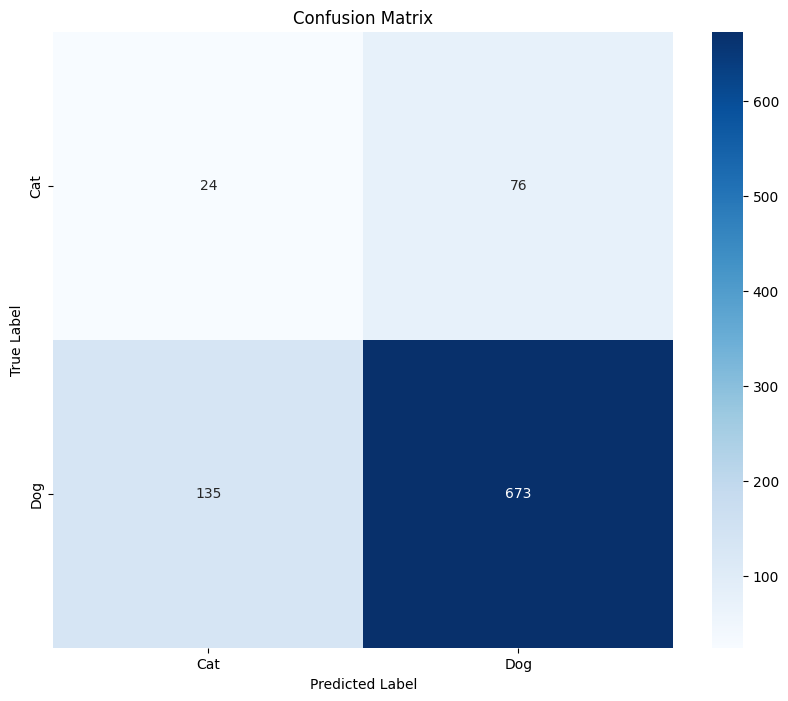

In [8]:
model_species_improved = load_model('/content/drive/MyDrive/CV - Animal Emotion Recognition/species_model_improved.h5')

# Đánh giá hiệu năng nhận biết loài vật
print("Evaluation for Animal Species Recognition Model Improved")
evaluate_model(model_species_improved, val_species_generator, class_labels=train_species_generator.class_indices.keys())